In [12]:
import numpy as np
import pandas as pd
import ast
from sentence_transformers import util
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
from sklearn.model_selection import GridSearchCV


In [15]:
jokes = pd.read_csv('combined_dataframe_only_with_questionmarks_only_good_explanations_manuallyfiltered_EMBEDDINGS_minilm_openai_COMPLETE_with_score_and_metrics_ONLY_ALL_CLASSES_MANUALLY_CLEANED_embeds_metrics.csv')


In [16]:
jokes

,index,setup,punchline,central_expression,explanation,sentence1,sentence2,score,score_class,emb_minilm_setup,...,emb_openai_sentence1,emb_openai_sentence2,minilm_obviousness,minilm_compatibility,minilm_symmetry,minilm_comparison,openai_obviousness,openai_compatibility,openai_symmetry,openai_comparison
0,0,What did the cow say to the horse?,mooooooo,moo,Moo can refer to the sound made by a cow,The cows moo resonated through the quiet barn,It is often recognized that farm animals comm...,0.0,0.0,"[-0.06343431025743484, 0.07145507633686066, 0....",...,"[0.014327851124107838, -0.014487870037555695, ...","[0.034221064299345016, -0.014209607616066933, ...",0.551015,0.369226,0.181789,0.285343,0.392444,0.435205,-0.042761,0.392444
1,1,Why did the manic depressive cross the freeway?,to get to the *other side*,side,The other side of the road and the afterlife,I crossed the road to get on the other side,They passed the entire day speaking of what t...,0.0,0.0,"[0.028215395286679268, 0.019356323406100273, -...",...,"[0.021623745560646057, -0.02021285705268383, 0...","[0.034786224365234375, 0.01729671284556389, 0....",0.403589,0.266366,0.137223,0.369188,0.346557,0.388428,-0.041871,0.346516
2,2,Why did the cook go to jail?,he was caught beating the egg,beating,Literal meaning: In cooking to beat an egg me...,She beat the eggs vigorously before adding th...,The suspect was arrested after allegedly beat...,0.0,0.0,"[0.0205070860683918, 0.06139203533530235, -0.0...",...,"[0.02929336205124855, -0.021888582035899162, 0...","[-0.020598527044057846, -0.010459757409989834,...",0.256630,0.409498,-0.152868,0.452507,0.387086,0.469080,-0.081994,0.387084
3,3,What do you call a sleeping prisoner?,under a-rest.,arrest,The word arrest refers to the act of taking s...,The suspect was taken into arrest for his inv...,After a long walk he needed a rest.,0.0,0.0,"[0.006578017957508564, 0.051659222692251205, -...",...,"[0.005972945597022772, -0.00969986617565155, 0...","[0.000523456372320652, -0.010252744890749454, ...",0.219059,0.421162,-0.202103,0.331234,0.292016,0.391503,-0.099487,0.291997
4,4,What kind of chili do they serve at the cannib...,Chili con carne!,chili con carne,The pun plays on the Spanish name for a spicy ...,I ordered a bowl of spicy chili con carne at t...,In the dystopian novel the prisoners whispered...,0.0,0.0,"[-0.02666369453072548, 0.04412837699055672, -0...",...,"[0.010147486813366413, -0.03648534417152405, -...","[0.01545970980077982, 0.009356831200420856, -0...",0.479236,0.567271,-0.088035,0.468881,0.407843,0.387505,0.020338,0.407859
5,5,What do you call a fat psychic?,a large. (because medium),large,This word can mean both a size and a term for...,The medium told me about my future,I could't find a medium shirt only a large,0.0,0.0,"[-0.009843175299465656, -0.013819030486047268,...",...,"[0.043553128838539124, -0.0062326774932444096,...","[0.05013548955321312, -0.033316317945718765, -...",0.355383,0.560537,-0.205154,0.337096,0.248499,0.518470,-0.269971,0.248456
6,0,What do you call ghosts that haunt liquor stores?,spirits,spirits,"In the context of this joke, spirits refers to...",Many religions believe in the existence of sp...,"After a long day at work, many people enjoy u...",9.0,1.0,"[-0.00029177297255955637, 0.018897240981459618...",...,"[0.019595112651586533, 0.016181860119104385, -...","[-0.017984991893172264, -0.0015226304531097412...",0.290149,0.553695,-0.263547,0.543695,0.436476,0.349669,0.086808,0.436607
7,1,Why did the cookie get fired from his job?,he came to work baked.,baked,The term baked can mean being under the influ...,The chefs baked the cookies until they were g...,He was so baked that he couldnt remember wher...,8.0,1.0,"[-0.03357457369565964, 0.03339084982872009, 0....",...,"[-0.0004587018338497728, -0.03543522208929062,...","[-6.550754915224388e-05, -0.08035273849964142,...",0.458660,0.561099,-0.102438,0.554681,0.474683,0.508957,-0.034273,0.474731
8,2,Why did the robot get the electric chair?,because he was ch

In [17]:
# Check the distribution of classes in y_train
class_counts = jokes['score_class'].value_counts()
print(class_counts)

score_class
2.0    10
3.0     8
1.0     7
0.0     6
4.0     5
Name: count, dtype: int64


In [18]:
def metrics (y_true, y_predicted):
    accuracy = accuracy_score(y_true, y_predicted)
    print("Accuracy: ", accuracy)
    precision = precision_score(y_true, y_predicted, average='weighted')
    print("Précision: ", precision)
    recall = recall_score(y_true, y_predicted, average='weighted')
    print("Recall: ", recall)
    f1 = f1_score(y_true, y_predicted, average='weighted')
    print("F1-score: ", f1)
    conf_mat = confusion_matrix(y_true, y_predicted, normalize='all')
    print("Confusion Matrix:\n", conf_mat)


# ======
# MINILM
# ======

In [26]:
subset_df = jokes[['minilm_symmetry', 'minilm_compatibility', 'minilm_obviousness', 'minilm_comparison', 'score_class']].copy()
data = subset_df[['minilm_symmetry', 'minilm_compatibility', 'minilm_obviousness', 'minilm_comparison']] 
target = subset_df['score_class']

x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.3, shuffle=True, random_state=40)


In [28]:
filtered_jokes = jokes[jokes['score'] > 1000]
filtered_jokes = filtered_jokes[filtered_jokes['minilm_symmetry'] < 0.1]
for row in filtered_jokes.itertuples():
    print(row.score, " - ", row.setup, row.punchline, " | symmetry: ", row.minilm_symmetry)

2379.0  -  How did the farmer find the sheep in the tall grass?  very satisfying.  | symmetry:  -0.0492584407329559
1795.0  -  What do you call a cheap circumcision?  A rip-off.  | symmetry:  -0.3139704763889313
1680.0  -  What do you call it when batman skips church?  christian bale!  | symmetry:  -0.0685623940080404
1632.0  -  What is the hardest part about being a pedophile?  fitting in  | symmetry:  -0.1884518563747406
1486.0  -  Why is leather armor best for sneaking?  its literally made of hide  | symmetry:  -0.1625584065914154


In [21]:
filtered_jokes = jokes[jokes['score'] < 10]
filtered_jokes = filtered_jokes[filtered_jokes['minilm_symmetry'] < 0.1]
for row in filtered_jokes.itertuples():
    print(row.score, " - ", row.setup, row.punchline, " | symmetry: ", row.minilm_symmetry)

0.0  -  Why did the cook go to jail?  he was caught beating the egg  | symmetry:  -0.1528678238391876
0.0  -  What do you call a sleeping prisoner?  under a-rest.  | symmetry:  -0.2021028399467468
0.0  -  What kind of chili do they serve at the cannibal prison?  Chili con carne!  | symmetry:  -0.0880345106124877
0.0  -  What do you call a fat psychic?  a large. (because medium)  | symmetry:  -0.2051542699337005
9.0  -  What do you call ghosts that haunt liquor stores?  spirits  | symmetry:  -0.2635467052459717
8.0  -  Why did the cookie get fired from his job?  he came to work baked.  | symmetry:  -0.1024382412433624
8.0  -  Why did the robot get the electric chair?  because he was charged with battery.  | symmetry:  -0.3798576593399048
5.0  -  What do you call a beaten up pretzel?  a salted pretzel  | symmetry:  -0.0414966344833374
1.0  -  What do you call a sad tree?  mourning wood.  | symmetry:  -0.2708891779184341
8.0  -  What does an orphan and a bottle of champagne have in common

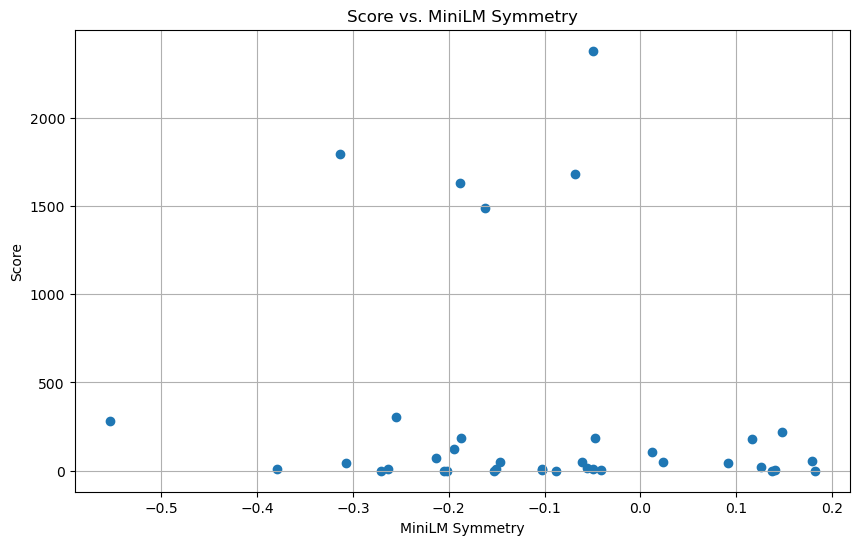

In [22]:
import matplotlib.pyplot as plt

# Plot the score values
plt.figure(figsize=(10, 6))
plt.scatter(jokes['minilm_symmetry'],jokes['score'])
plt.title('Score vs. MiniLM Symmetry')
plt.xlabel('MiniLM Symmetry')
plt.ylabel('Score')
plt.grid(True)
plt.show()


# SVM

In [17]:
from sklearn import svm
clf = svm.SVC(kernel='linear') # Linear Kernel

clf.fit(x_train, y_train)
plt.show()

y_pred_train = clf.predict(x_train)
metrics(y_train, y_pred_train)
print()
y_pred_test = clf.predict(x_test)
metrics(y_test, y_pred_test)



Accuracy:  0.52
Précision:  0.3680701754385965
Recall:  0.52
F1-score:  0.40501424501424504
Confusion Matrix:
 [[0.   0.   0.12 0.   0.  ]
 [0.   0.2  0.08 0.   0.  ]
 [0.   0.   0.32 0.   0.  ]
 [0.   0.04 0.16 0.   0.  ]
 [0.   0.   0.08 0.   0.  ]]



/opt/miniconda3/envs/humour/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/envs/humour/lib/python3.13/site-packages/sklearn/utils/_array_api.py:399: RuntimeWarning: invalid value encountered in cast
  return x.astype(dtype, copy=copy, casting=casting)


ValueError: Input y_true contains NaN.

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(x_train, y_train)
plt.show()

y_pred_train = clf.predict(x_train)
metrics(y_train, y_pred_train)
print()
y_pred_test = clf.predict(x_test)
metrics(y_test, y_pred_test)



# Random forest

In [ ]:
# Define the classifier
clf = RandomForestClassifier()

# Define a grid of hyperparameters to search
param_grid = {
    'n_estimators': [5, 10, 20, 30, 40, 50, 100, 200, 300],           # number of trees
    'max_depth': [None, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20],          # None means full depth
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70],      # minimum samples to split a node
}

# Setup grid search with 5-fold cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Results
print("Best parameters:", grid_search.best_params_)
print("Best cross-validated accuracy:", grid_search.best_score_)

# Use the optimized model
clf = grid_search.best_estimator_






# Create and train the random forest (depth determined automatically)
#clf = RandomForestClassifier(max_depth=5)  # n_estimators is number of trees
clf.fit(x_train, y_train)

# Plot one of the trees in the forest for visualization
plt.figure(figsize=(20,10))
plot_tree(clf.estimators_[0], filled=True)  # Plot the first tree in the ensemble
plt.show()



y_pred_train = clf.predict(x_train)
metrics(y_train, y_pred_train)
print()
y_pred_test = clf.predict(x_test)
metrics(y_test, y_pred_test)

# Regression

In [18]:
subset_df = jokes[['minilm_symmetry', 'minilm_compatibility', 'minilm_obviousness', 'minilm_comparison', 'score']].copy()
data = subset_df[['minilm_symmetry', 'minilm_compatibility', 'minilm_obviousness', 'minilm_comparison']]
target = subset_df['score']
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, shuffle=True, random_state=40)


# Create and train the model
model = LinearRegression()
model.fit(x_train, y_train)

# Predict
y_pred = model.predict(x_test)

# Evaluation
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean squared error:", mean_squared_error(y_test, y_pred))
print("R² score:", r2_score(y_test, y_pred))


Coefficients: [ -159.55407249 -1164.07102646 -1323.62509895   -87.8851932 ]
Intercept: 1089.699587938174
Mean squared error: 254544.2941611762
R² score: 0.08056196365672663


# ======
# OPENAI
# ======

In [ ]:
subset_df = jokes[['openai_symmetry', 'openai_compatibility', 'openai_obviousness', 'openai_comparison', 'score_class']].copy()
data = subset_df[['openai_symmetry', 'openai_compatibility', 'openai_obviousness', 'openai_comparison']] 
target = subset_df['score_class']

x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.3, shuffle=True, random_state=40)


# SVM

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='linear') # Linear Kernel

clf.fit(x_train, y_train)
plt.show()

y_pred_train = clf.predict(x_train)
metrics(y_train, y_pred_train)
print()
y_pred_test = clf.predict(x_test)
metrics(y_test, y_pred_test)



# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(x_train, y_train)
plt.show()

y_pred_train = clf.predict(x_train)
metrics(y_train, y_pred_train)
print()
y_pred_test = clf.predict(x_test)
metrics(y_test, y_pred_test)



# Random forest

In [ ]:
# Define the classifier
clf = RandomForestClassifier()

# Define a grid of hyperparameters to search
param_grid = {
    'n_estimators': [5, 10, 20, 30, 40, 50, 100, 200, 300],           # number of trees
    'max_depth': [None, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20],          # None means full depth
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70],      # minimum samples to split a node
}

# Setup grid search with 5-fold cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Results
print("Best parameters:", grid_search.best_params_)
print("Best cross-validated accuracy:", grid_search.best_score_)

# Use the optimized model
clf = grid_search.best_estimator_






# Create and train the random forest (depth determined automatically)
#clf = RandomForestClassifier(max_depth=5)  # n_estimators is number of trees
clf.fit(x_train, y_train)

# Plot one of the trees in the forest for visualization
plt.figure(figsize=(20,10))
plot_tree(clf.estimators_[0], filled=True)  # Plot the first tree in the ensemble
plt.show()



y_pred_train = clf.predict(x_train)
metrics(y_train, y_pred_train)
print()
y_pred_test = clf.predict(x_test)
metrics(y_test, y_pred_test)

# Regression

In [19]:
subset_df = jokes[['openai_symmetry', 'openai_compatibility', 'openai_obviousness', 'openai_comparison', 'score']].copy()
data = subset_df[['openai_symmetry', 'openai_compatibility', 'openai_obviousness', 'openai_comparison']]
target = subset_df['score']
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, shuffle=True, random_state=40)


# Create and train the model
model = LinearRegression()
model.fit(x_train, y_train)

# Predict
y_pred = model.predict(x_test)

# Evaluation
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean squared error:", mean_squared_error(y_test, y_pred))
print("R² score:", r2_score(y_test, y_pred))


Coefficients: [  458929.48565732   457851.7590035    916781.24466081 -1376292.7455068 ]
Intercept: 860.0996504629506
Mean squared error: 261027.5498474516
R² score: 0.057143831669348555


In [31]:
print(jokes[['openai_obviousness', 'score', 'score_class']].head())

   openai_obviousness  score  score_class
0            0.392444    0.0          0.0
1            0.346557    0.0          0.0
2            0.387086    0.0          0.0
3            0.292016    0.0          0.0
4            0.407843    0.0          0.0


In [33]:
import matplotlib.pyplot as plt

# Define a color map for the classes
color_map = {
    0: 'red',
    1: 'orange',
    2: 'yellow',
    3: 'green',
    4: 'blue'
}
jokes['score_class'] = jokes['score_class'].astype(int)

# Map colors to each row based on the score_class column
colors = jokes['score_class'].map(color_map)
jokes['score_class'] = jokes['score_class'].astype(int)
plt.figure(figsize=(8, 6))
plt.scatter(jokes['openai_obviousness'], jokes['score'], c=colors, label=jokes['score_class'])
plt.xlabel('OpenAI Obviousness')
plt.ylabel('Score')
plt.title('Joke Score vs. OpenAI Obviousness')
plt.grid(True)
plt.tight_layout()

# Optional: custom legend
handles = [plt.Line2D([0], [0], marker='o', color='w', label=cls, 
                      markerfacecolor=col, markersize=10)
           for cls, col in color_map.items()]
plt.legend(handles=handles, title='Score Class')

plt.show()

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [ ]:
color_map = {
    '0.0': 'red',
    '1.0': 'yellow',
    '2.0': 'orange',
    '3.0': 'green',
    '4.0': 'blue'
}

# Map colors to each row based on the score_class column
colors = jokes['score_class'].map(color_map)



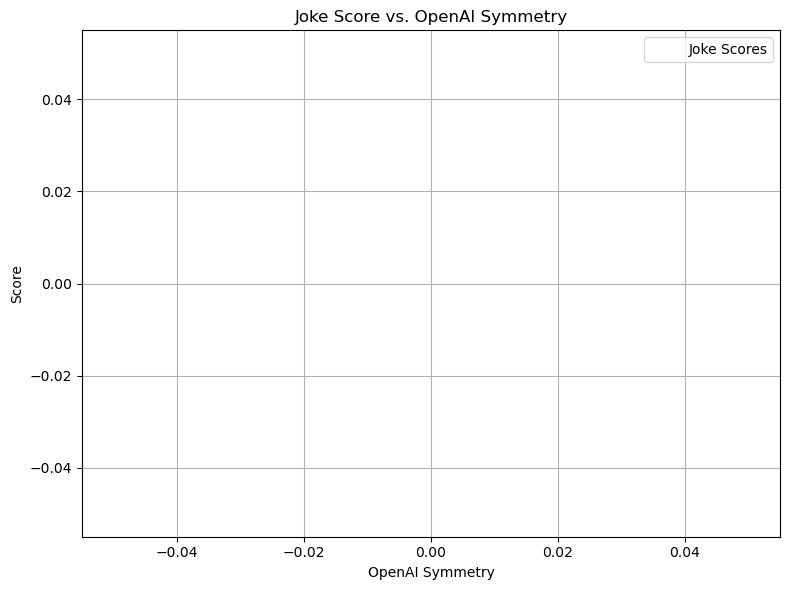

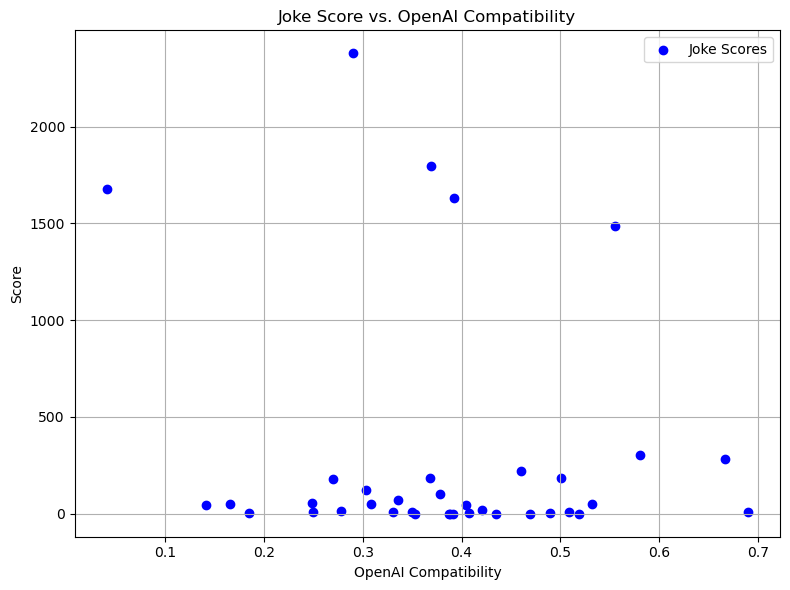

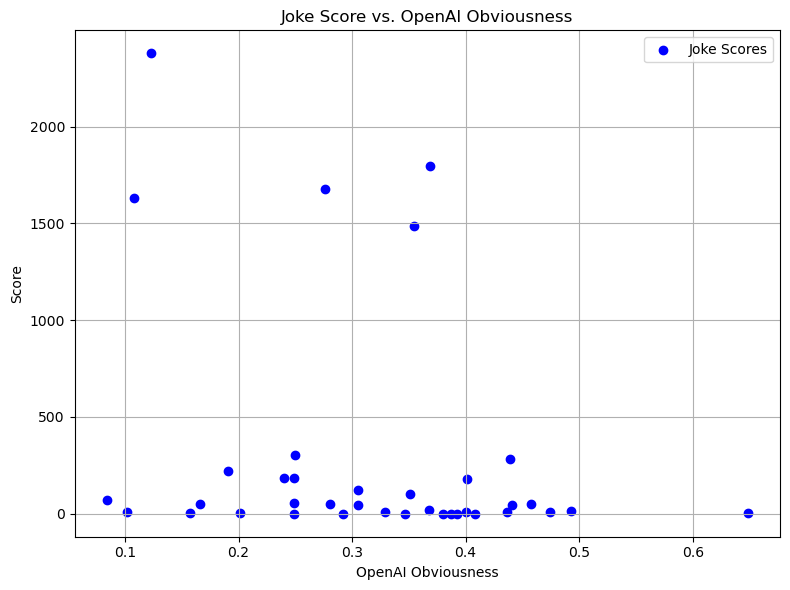

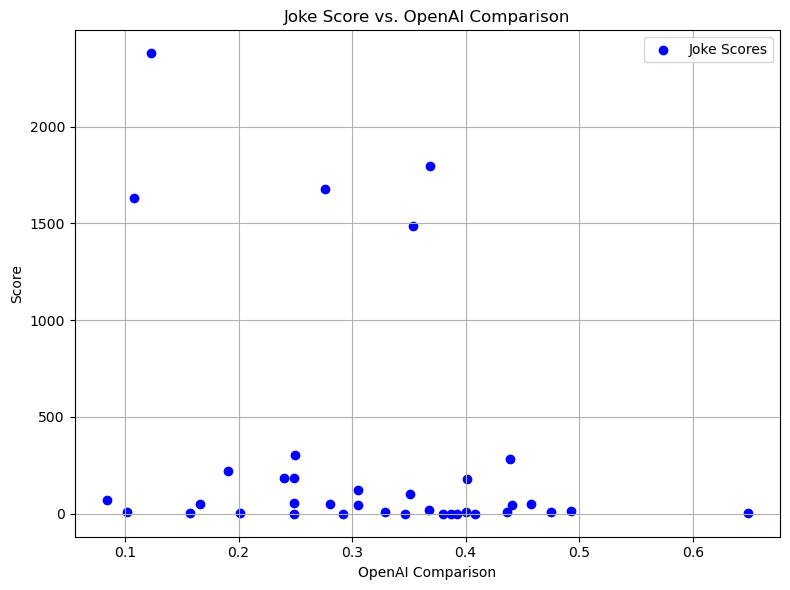

In [29]:

plt.figure(figsize=(8, 6))
plt.scatter(jokes['openai_symmetry'], jokes['score'], color='blue', label='Joke Scores')
plt.xlabel('OpenAI Symmetry')
plt.ylabel('Score')
plt.title('Joke Score vs. OpenAI Symmetry')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(jokes['openai_compatibility'], jokes['score'], color='blue', label='Joke Scores')
plt.xlabel('OpenAI Compatibility')
plt.ylabel('Score')
plt.title('Joke Score vs. OpenAI Compatibility')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(jokes['openai_obviousness'], jokes['score'], color='blue', label='Joke Scores')
plt.xlabel('OpenAI Obviousness')
plt.ylabel('Score')
plt.title('Joke Score vs. OpenAI Obviousness')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(jokes['openai_comparison'], jokes['score'], color='blue', label='Joke Scores')
plt.xlabel('OpenAI Comparison')
plt.ylabel('Score')
plt.title('Joke Score vs. OpenAI Comparison')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


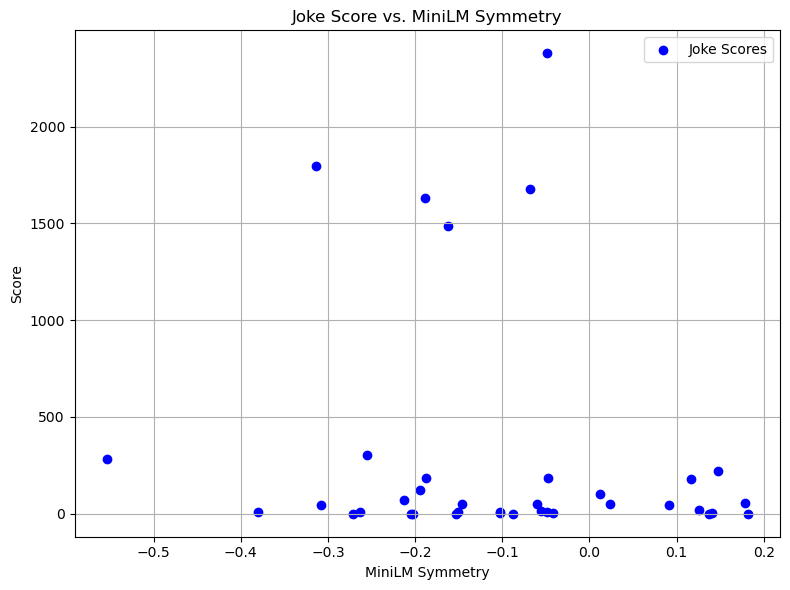

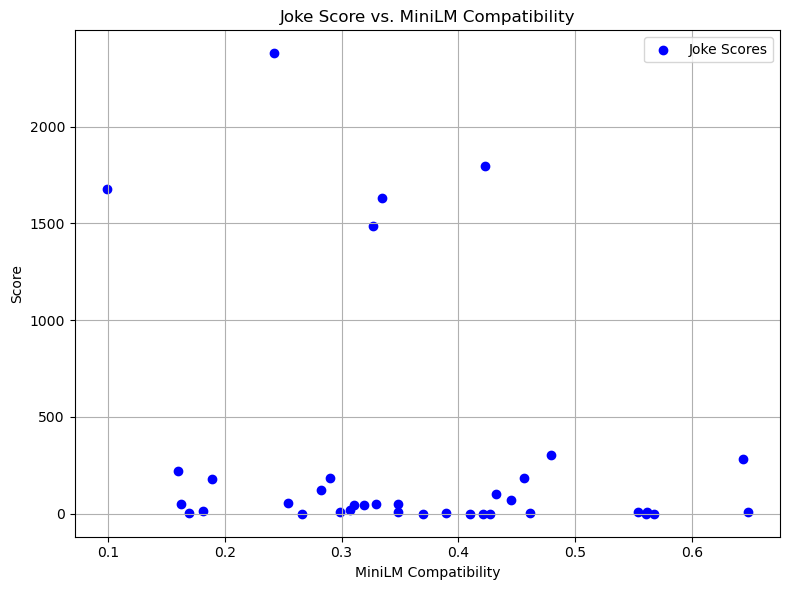

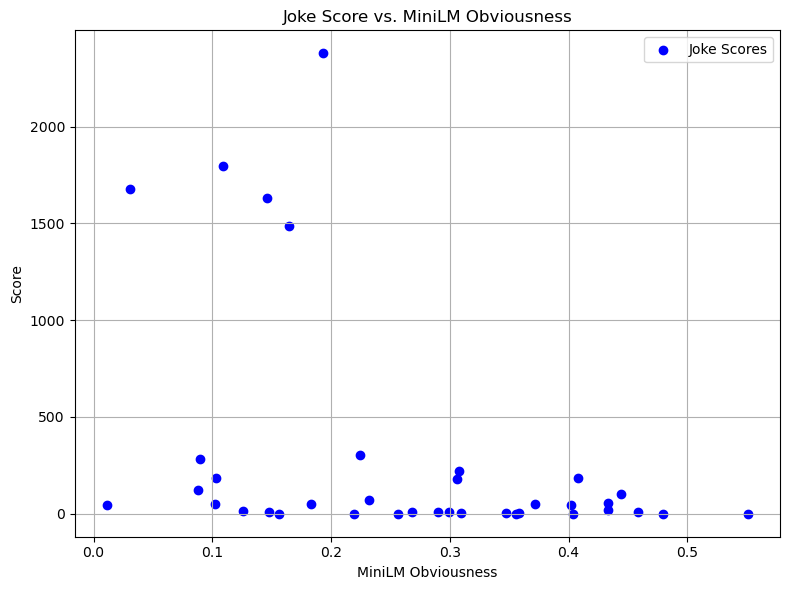

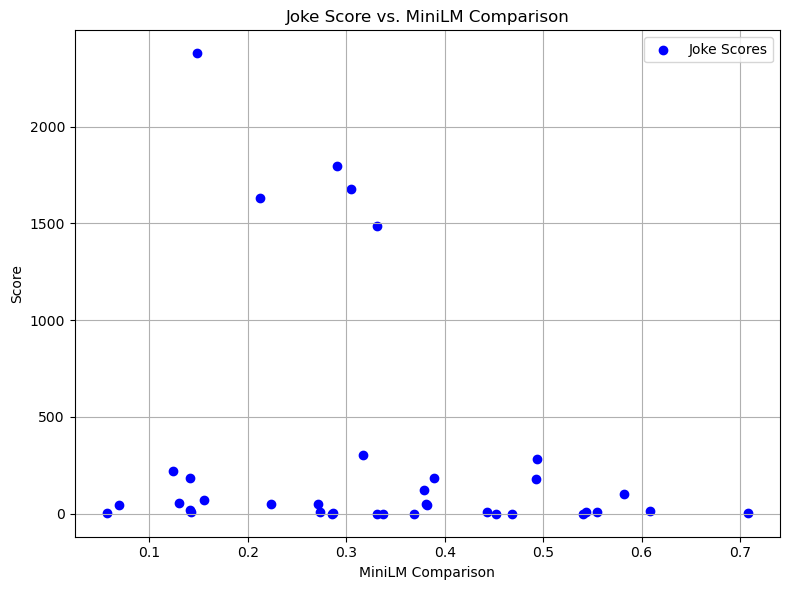

In [27]:
plt.figure(figsize=(8, 6))
plt.scatter(jokes['minilm_symmetry'], jokes['score'], color='blue', label='Joke Scores')
plt.xlabel('MiniLM Symmetry')
plt.ylabel('Score')
plt.title('Joke Score vs. MiniLM Symmetry')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(jokes['minilm_compatibility'], jokes['score'], color='blue', label='Joke Scores')
plt.xlabel('MiniLM Compatibility')
plt.ylabel('Score')
plt.title('Joke Score vs. MiniLM Compatibility')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(jokes['minilm_obviousness'], jokes['score'], color='blue', label='Joke Scores')
plt.xlabel('MiniLM Obviousness')
plt.ylabel('Score')
plt.title('Joke Score vs. MiniLM Obviousness')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(jokes['minilm_comparison'], jokes['score'], color='blue', label='Joke Scores')
plt.xlabel('MiniLM Comparison')
plt.ylabel('Score')
plt.title('Joke Score vs. MiniLM Comparison')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [46]:
jokes = pd.read_csv('combined_dataframe_only_with_questionmarks_only_good_explanations_manuallyfiltered_EMBEDDINGS_minilm_openai_COMPLETE_with_score_and_metrics_ONLY_ALL_CLASSES_MANUALLY_CLEANED_embeds_metrics_euclid_dist.csv')



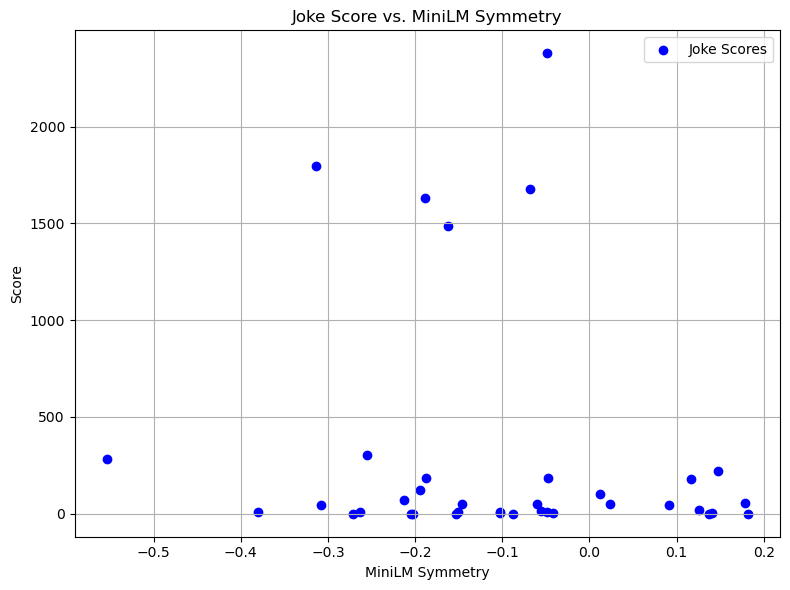

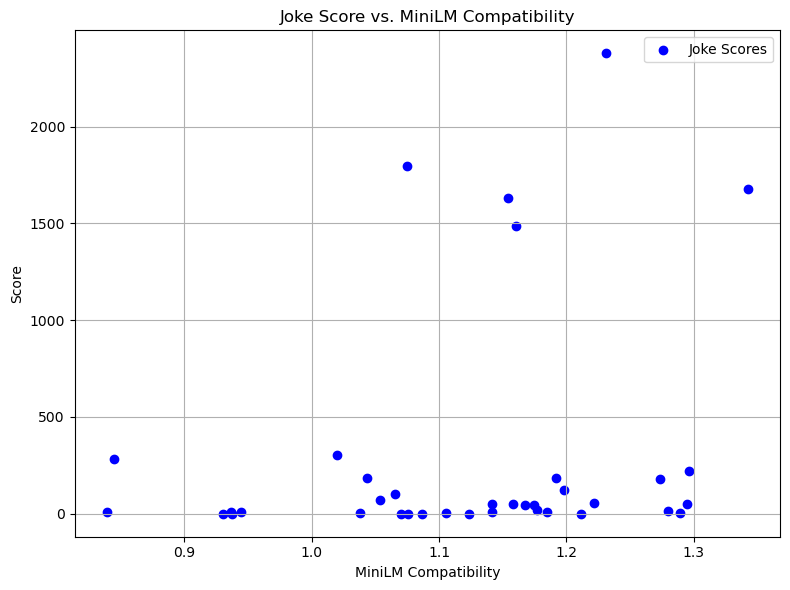

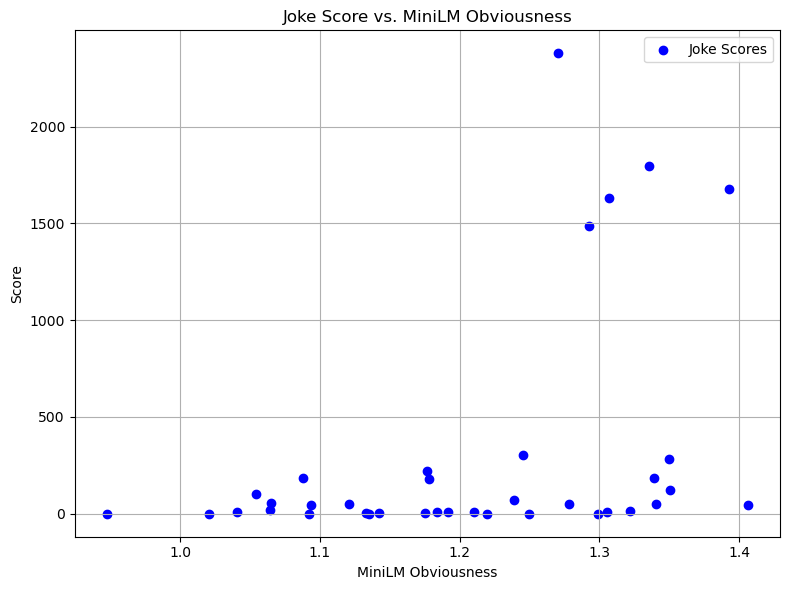

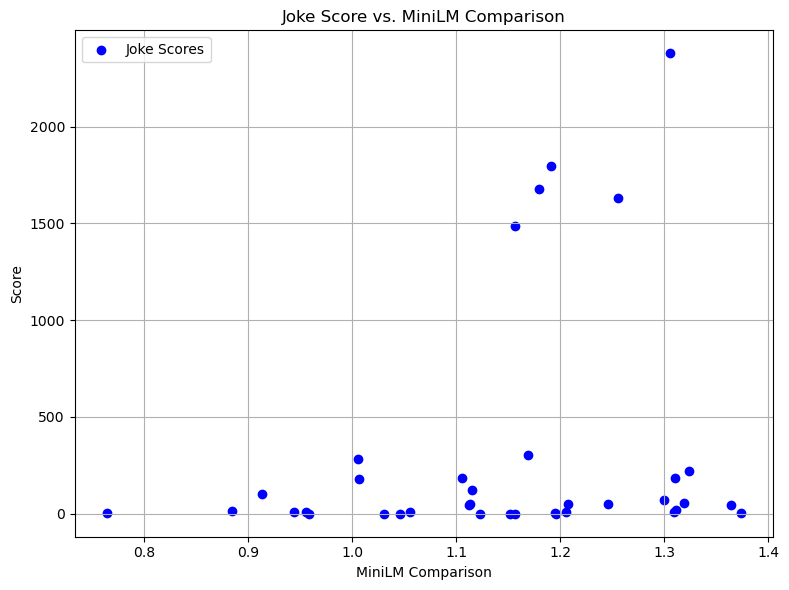

In [47]:
plt.figure(figsize=(8, 6))
plt.scatter(jokes['minilm_symmetry_eudist'], jokes['score'], color='blue', label='Joke Scores')
plt.xlabel('MiniLM Symmetry')
plt.ylabel('Score')
plt.title('Joke Score vs. MiniLM Symmetry')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(jokes['minilm_compatibility_eudist'], jokes['score'], color='blue', label='Joke Scores')
plt.xlabel('MiniLM Compatibility')
plt.ylabel('Score')
plt.title('Joke Score vs. MiniLM Compatibility')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(jokes['minilm_obviousness_eudist'], jokes['score'], color='blue', label='Joke Scores')
plt.xlabel('MiniLM Obviousness')
plt.ylabel('Score')
plt.title('Joke Score vs. MiniLM Obviousness')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(jokes['minilm_comparison_eudist'], jokes['score'], color='blue', label='Joke Scores')
plt.xlabel('MiniLM Comparison')
plt.ylabel('Score')
plt.title('Joke Score vs. MiniLM Comparison')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


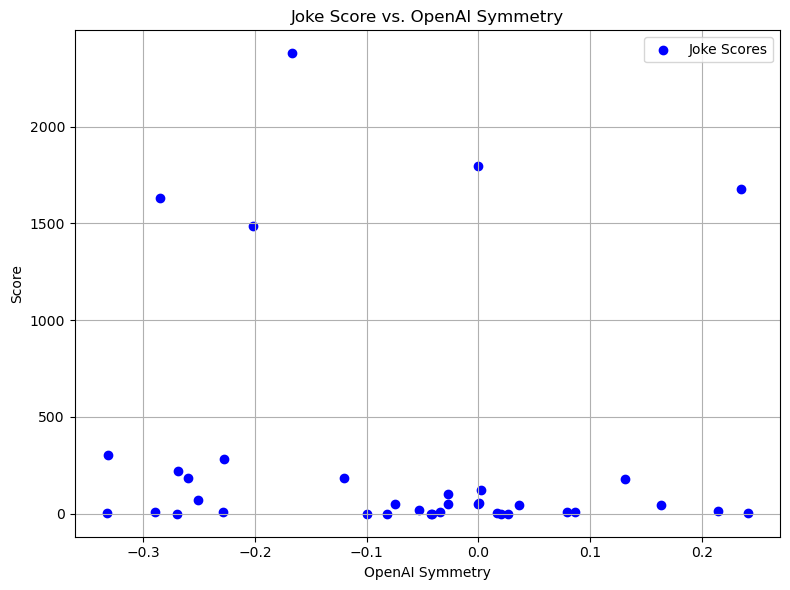

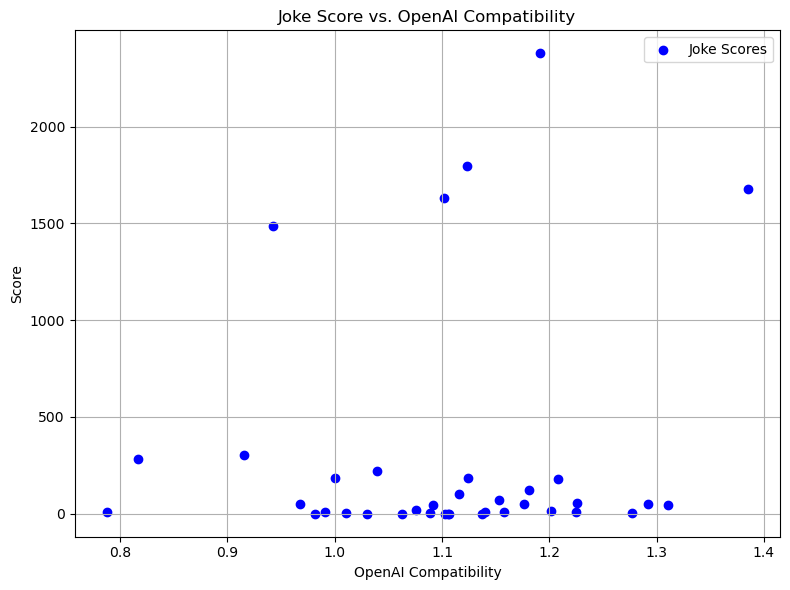

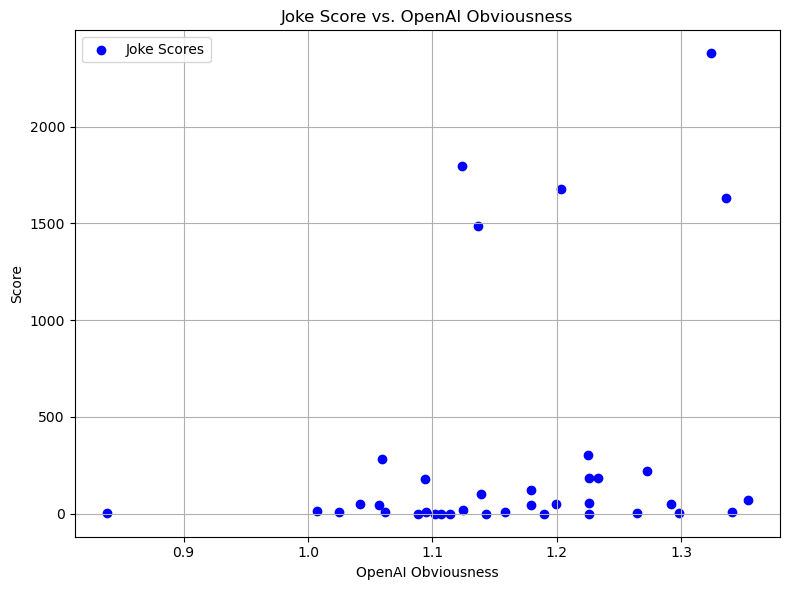

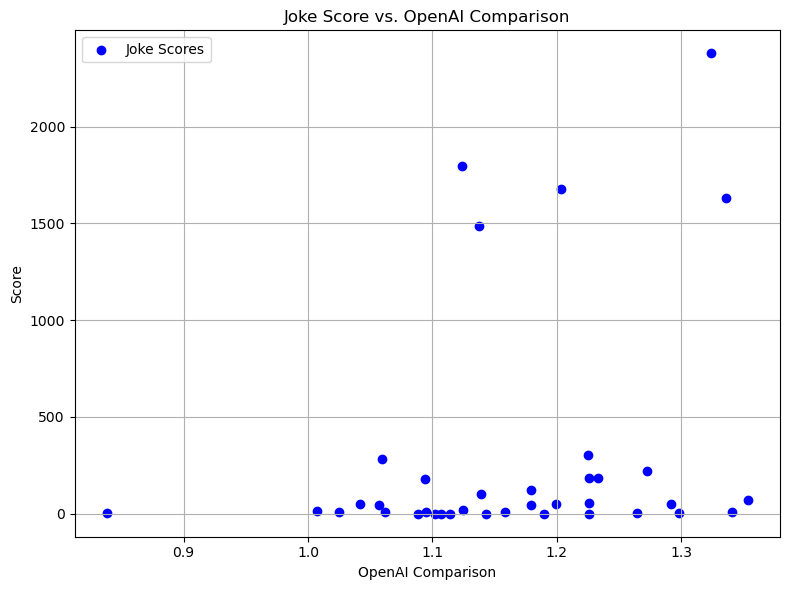

In [48]:

plt.figure(figsize=(8, 6))
plt.scatter(jokes['openai_symmetry_eudist'], jokes['score'], color='blue', label='Joke Scores')
plt.xlabel('OpenAI Symmetry')
plt.ylabel('Score')
plt.title('Joke Score vs. OpenAI Symmetry')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(jokes['openai_compatibility_eudist'], jokes['score'], color='blue', label='Joke Scores')
plt.xlabel('OpenAI Compatibility')
plt.ylabel('Score')
plt.title('Joke Score vs. OpenAI Compatibility')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(jokes['openai_obviousness_eudist'], jokes['score'], color='blue', label='Joke Scores')
plt.xlabel('OpenAI Obviousness')
plt.ylabel('Score')
plt.title('Joke Score vs. OpenAI Obviousness')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(jokes['openai_comparison_eudist'], jokes['score'], color='blue', label='Joke Scores')
plt.xlabel('OpenAI Comparison')
plt.ylabel('Score')
plt.title('Joke Score vs. OpenAI Comparison')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
